## <span style="color:green"> Notebook - Calculating Seismic Velocities </span>
<span style="color:purple">Sinan Ozaydin, School of Geosciences, The University of Sydney, NSW 2006, Australia <br/> </span>
<span style="color:purple">sinan.ozaydin@protonmail.com</span>

In this notebook, we we will explore how to calculate seismic velocities using the library pide for a given earth material. Seismic velocities in **pide** library are calculated by utilising the 'sister' library of pide **santex**. The isotropic velocities are calculated by the methods described in **Hacker et al., (2003)**. Material elastic parameters entered for all minerals are stored in materials.json file in pide_src and isotropy folder in santex. When a rock entered for the composition in pide, associated mineral assemblages in correspondent electrical conductivity models chosen are automatically calculated. Bulk velocities of the material formed are calculated by using Hashin-Shtrikman mixing function.

In [1]:
import pide
import numpy as np
import matplotlib.pyplot as plt

Let's try to make a controu figure to plot the effect of pressure and temperature of a Lherzolite matrix.

In [2]:
#Setting the temperature and pressure arrays
temp = np.arange(600,1500,10) #setting up temperature array
pressure = np.arange(1,6,0.1)
#Creating a meshgrid
T,P = np.meshgrid(temp,pressure)
#flattening the arrays to load into pide
T_array = T.ravel()
P_array = P.ravel()

p_obj = pide.pide() #creating the initial object

#Setting the temperature and pressure arrays.
p_obj.set_temperature(T_array) #setting temperature array in K
p_obj.set_pressure(P_array) 
#Setting the composition of the material.
p_obj.set_composition_solid_mineral(ol = 0.6, opx = 0.25, cpx = 0.1, garnet = 0.05)

#Calculating the seismic velocities.
v_bulk_lherz,v_p_lherz,v_s_lherz = p_obj.calculate_seismic_velocities()
print(v_s_lherz)
#Calculating for a harzburgite
p_obj.set_composition_solid_mineral(ol = 0.85, opx = 0.13, cpx = 0.02)
v_bulk_harz,v_p_harz,v_s_harz = p_obj.calculate_seismic_velocities()
#Calculating for a lherzolite with 8% phlogopites
p_obj.set_composition_solid_mineral(ol = 0.57, opx = 0.22, cpx = 0.08, garnet = 0.05,mica = 0.08)
v_bulk_phlg_lherz,v_p_phlg_lherz,v_s_phlg_lherz = p_obj.calculate_seismic_velocities()

[4.84375029 4.83978833 4.83581838 ... 4.64578501 4.64175659 4.63772883]


Text(0.5, 0.98, 'Lherzolite - Composition')

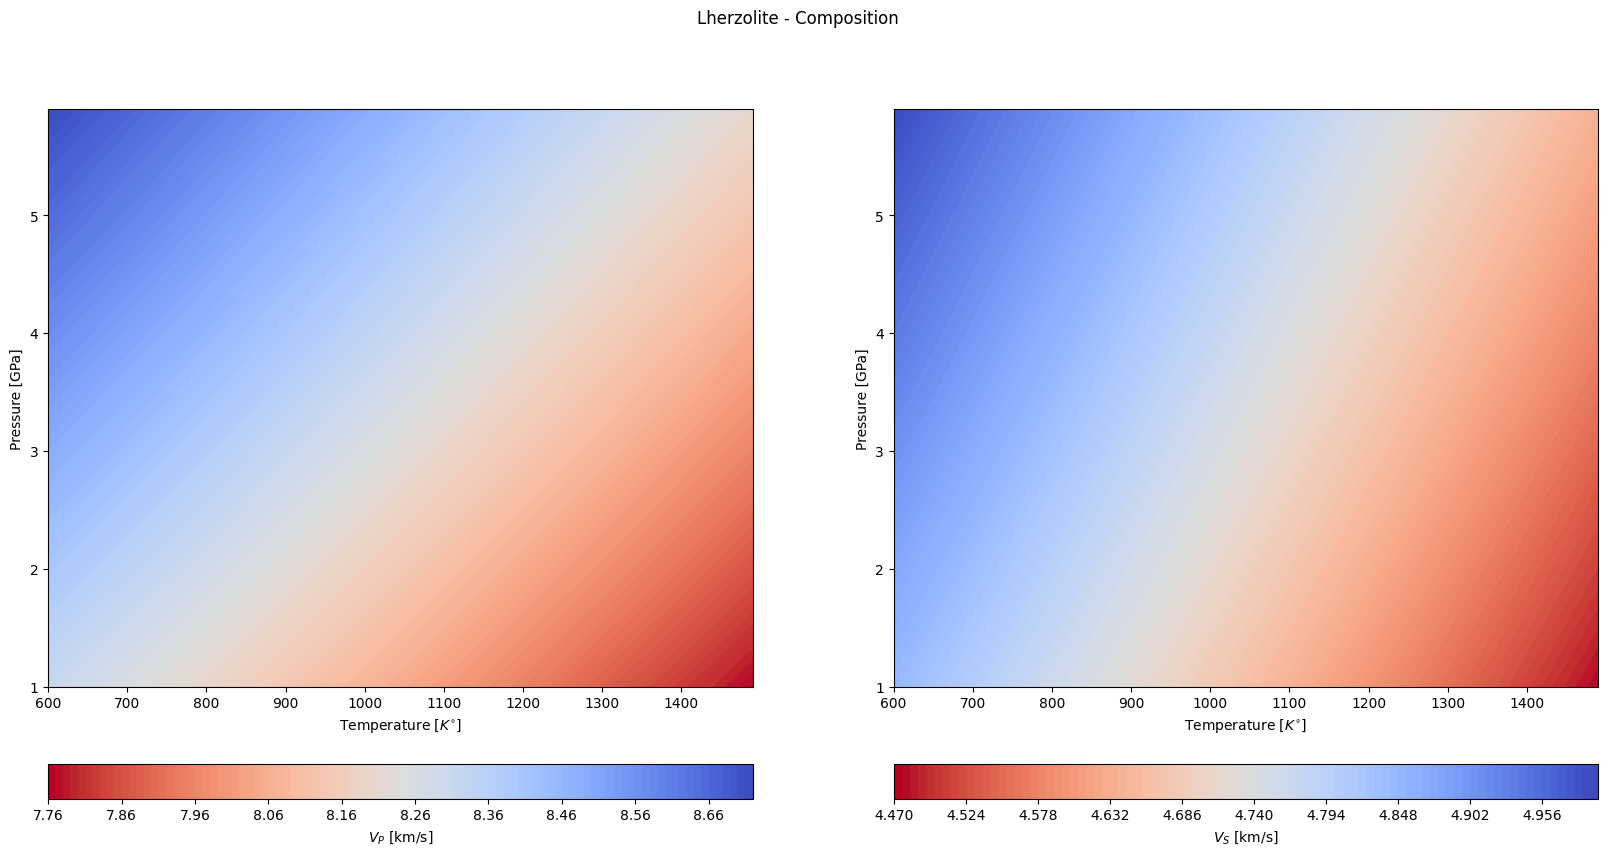

In [3]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(121)
cax = ax.tricontourf(T_array,P_array, v_p_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_p_lherz),np.amax(v_p_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			 ax = ax, label = r'$V_P$ [km/s]')

ax = plt.subplot(122)
cax = ax.tricontourf(T_array,P_array, v_s_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_s_lherz),np.amax(v_s_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			ax = ax, label = r'$V_S$ [km/s]')
fig.suptitle('Lherzolite - Composition')


Text(0.5, 0.98, 'Harzburgite - Composition')

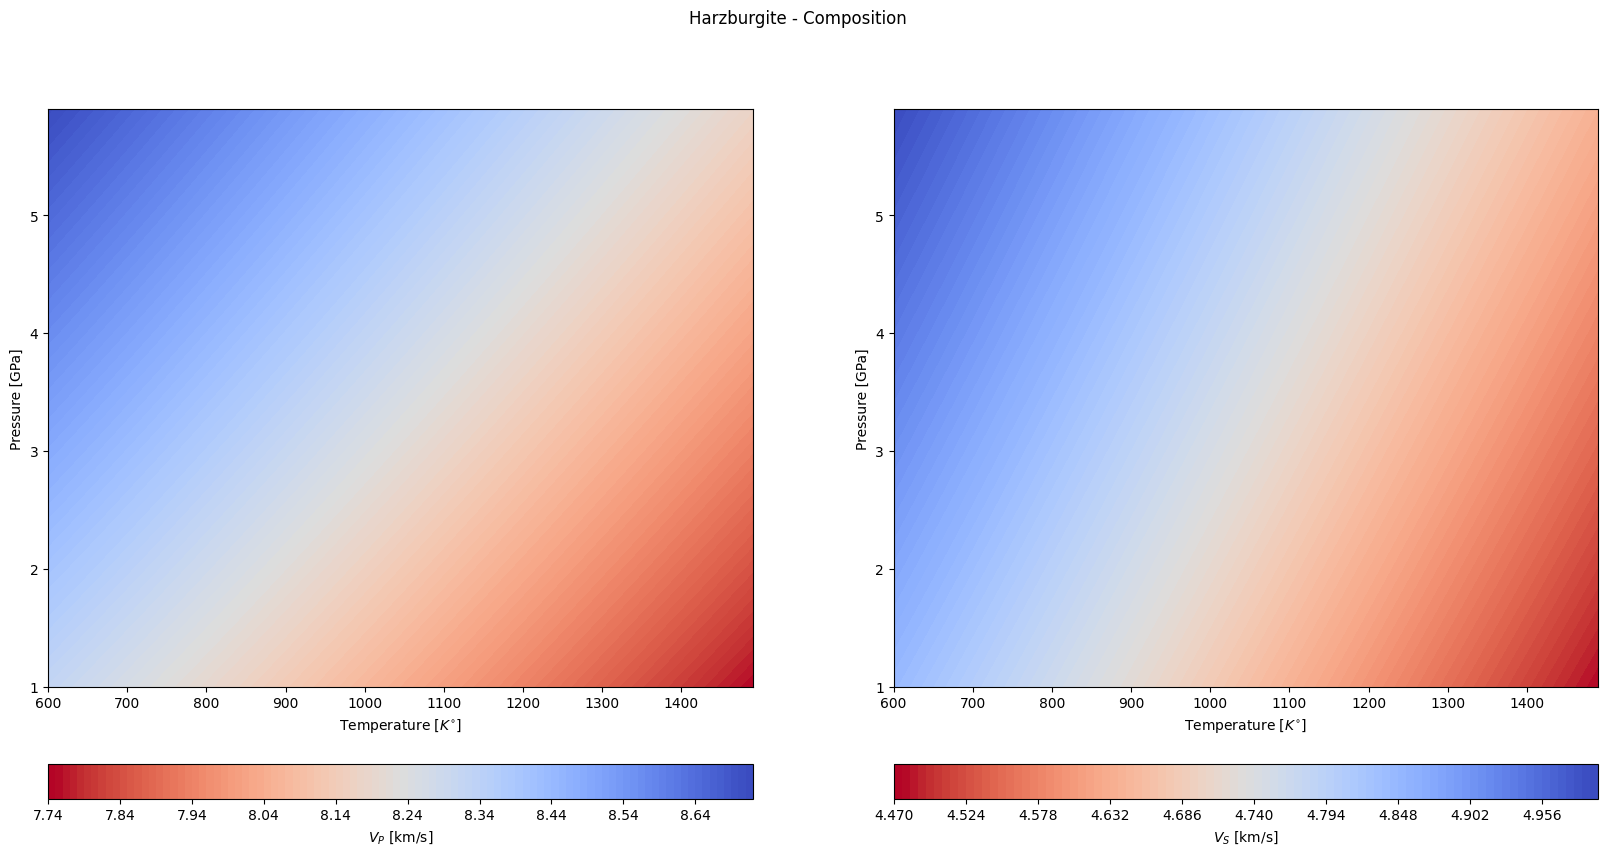

In [4]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(121)
cax = ax.tricontourf(T_array,P_array, v_p_harz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_p_harz),np.amax(v_p_harz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			 ax = ax, label = r'$V_P$ [km/s]')

ax = plt.subplot(122)
cax = ax.tricontourf(T_array,P_array, v_s_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_s_lherz),np.amax(v_s_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			ax = ax, label = r'$V_S$ [km/s]')
fig.suptitle('Harzburgite - Composition')

Text(0.5, 0.98, 'Lherzolite with 8% Phlogopite - Composition')

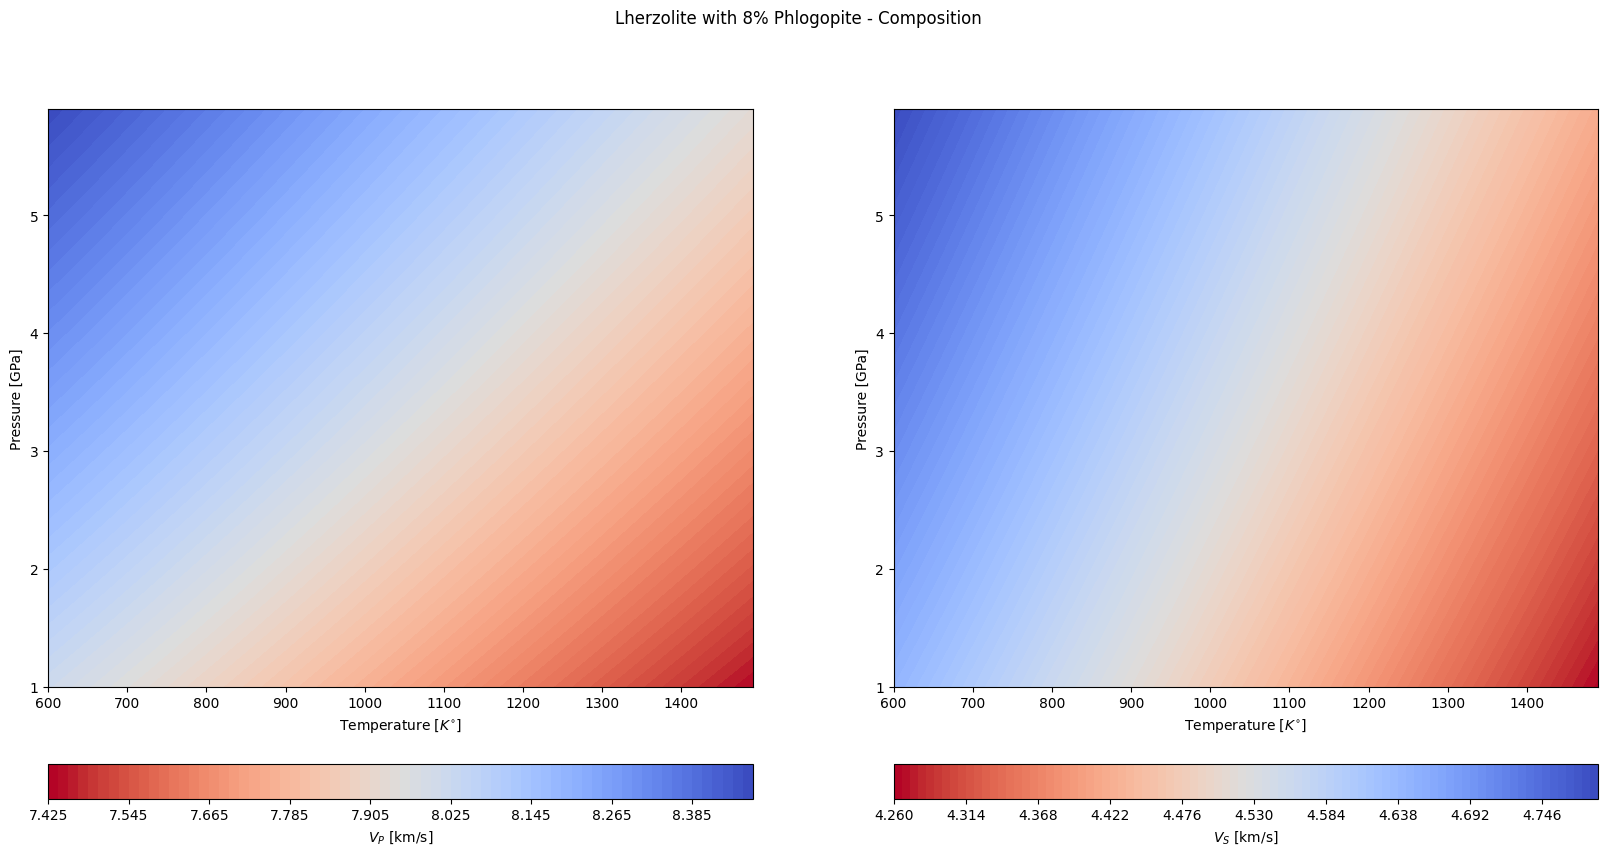

In [5]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(121)
cax = ax.tricontourf(T_array,P_array, v_p_phlg_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_p_phlg_lherz),np.amax(v_p_phlg_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			 ax = ax, label = r'$V_P$ [km/s]')

ax = plt.subplot(122)
cax = ax.tricontourf(T_array,P_array, v_s_phlg_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_s_phlg_lherz),np.amax(v_s_phlg_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			ax = ax, label = r'$V_S$ [km/s]')
fig.suptitle('Lherzolite with 8% Phlogopite - Composition')

Text(0.5, 0.98, 'Difference between Lherzolite and Lherzolite with phlogopite')

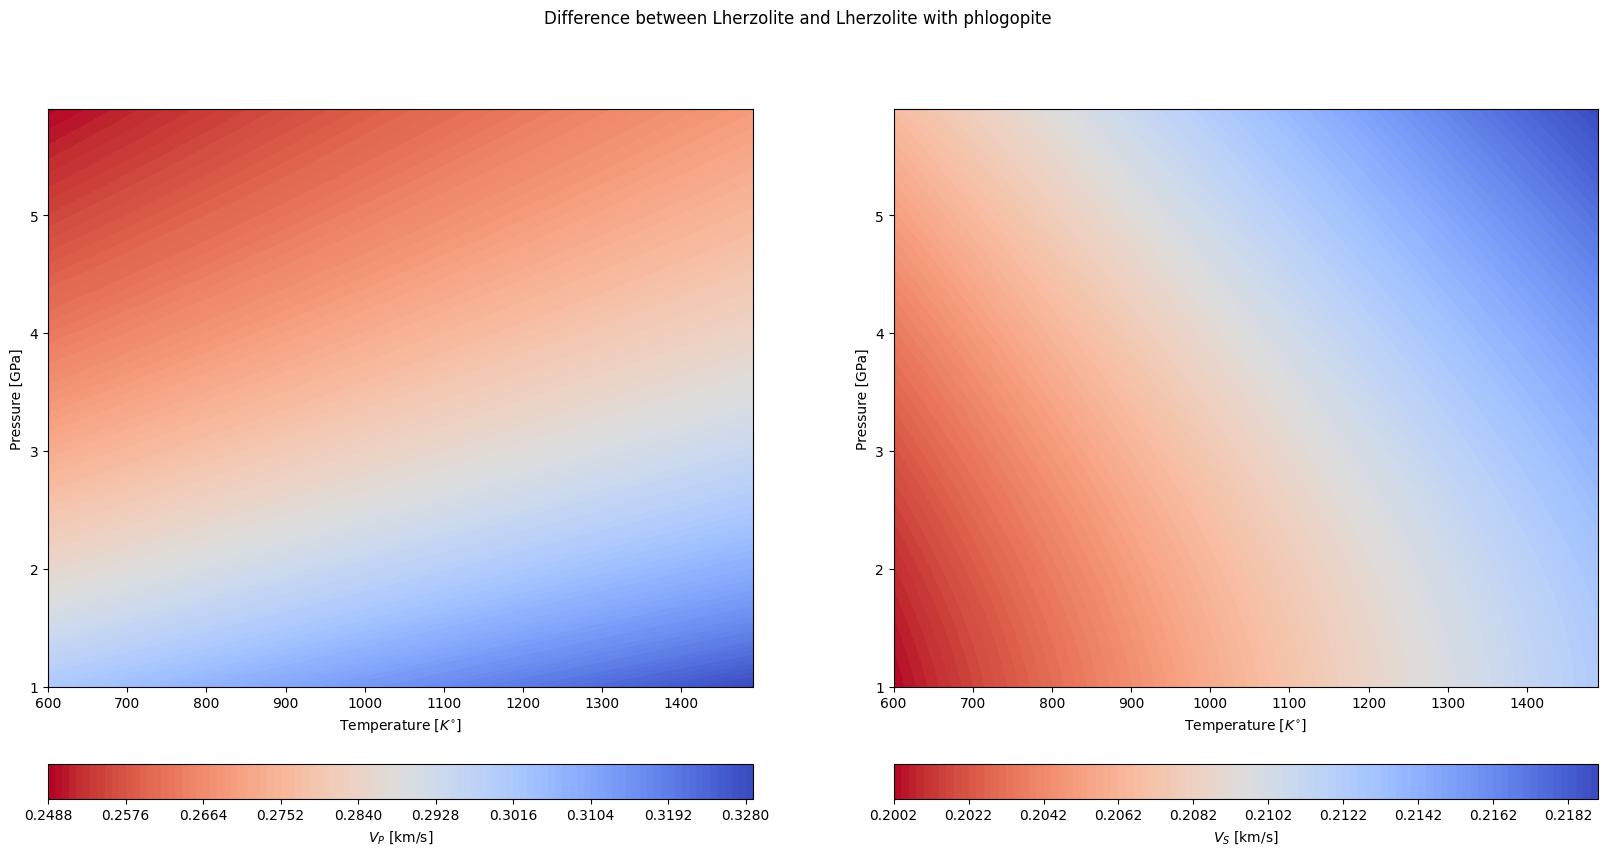

In [6]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(121)
cax = ax.tricontourf(T_array,P_array, v_p_lherz - v_p_phlg_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_p_lherz - v_p_phlg_lherz),np.amax(v_p_lherz - v_p_phlg_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			 ax = ax, label = r'$V_P$ [km/s]')

ax = plt.subplot(122)
cax = ax.tricontourf(T_array,P_array, v_s_lherz - v_s_phlg_lherz, cmap = 'coolwarm_r',levels = 100)
cax.set_clim(np.amin(v_s_lherz - v_s_phlg_lherz),np.amax(v_s_lherz - v_s_phlg_lherz))
ax.set_xlabel(r'Temperature [$K^{\circ}$]')
ax.set_ylabel(r'Pressure [GPa]')
cax_cb = fig.colorbar(cax, orientation="horizontal", pad=0.1,
			ax = ax, label = r'$V_S$ [km/s]')
fig.suptitle('Difference between Lherzolite and Lherzolite with phlogopite')